In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as pe
from SharedX import ShareXaxis
from UniversalColor import UniversalColor
from legend_shadow import legend_shadow
from scipy.io import readsav
import spiceypy as spice

import JupiterMag as jm
import Leadangle_wave as LeadA

import os

UC = UniversalColor()
UC.set_palette()

Importing Library
done


In [2]:
# 定数
RJ = 71492*1E+3  # Jupiter radius [m]
RE = 1560*1E+3   # Europa radius [m]
OMG_J = 2*np.pi/(9.55*3600)  # Angular velocity of Jupiter System III rotation [rad sec-1] 
OMG_G = 2*np.pi/(7.2*24*3600)   # Ganymede orbital angular velosity [rad/sec]

Psyn_eu = (11.22)*3600      # Moon's synodic period [sec]
Psyn_ga = (10.53)*3600      # Moon's synodic period [sec]

Tracing field line 2 of 2 (100.00)%
Tracing field line 2 of 2 (100.00)%
[0.38268343 0.57357644] [0. 0.] [-0.92387953 -0.81915204]


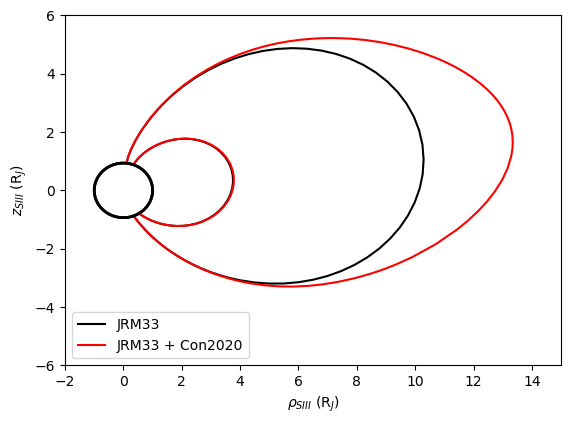

In [3]:
#be sure to configure external field model prior to tracing
jm.Con2020.Config(equation_type='analytic')
#this may also become necessary with internal models in future, e.g.
#setting the model degree

#create some starting positions
n = 2
theta = (180.0 - np.linspace(22.5,35,n))*np.pi/180.0
r = np.ones(n)
x0 = r*np.sin(theta)
y0 = np.zeros(n)
z0 = r*np.cos(theta)

#create trace objects, pass starting position(s) x0,y0,z0
T0 = jm.TraceField(x0,y0,z0,Verbose=True,IntModel='jrm33',ExtModel='none')
T1 = jm.TraceField(x0,y0,z0,Verbose=True,IntModel='jrm33',ExtModel='Con2020')

#plot a trace
ax = T0.PlotRhoZ(label='JRM33',color='black')
ax = T1.PlotRhoZ(fig=ax,label='JRM33 + Con2020',color='red')

ax.set_xlim(-2.0,15.0)
ax.set_ylim(-6.0,6.0)

print(x0, y0, z0)

In [77]:
jm.Internal.Config(Model='jrm33', CartesianIn=True, CartesianOut=True)
jm.Con2020.Config(equation_type='analytic')

r0 = 9.4       # [RJ]
x0 = r0*math.cos(math.radians(360.0-5.0))
y0 = r0*math.sin(math.radians(360.0-5.0))
z0 = 0
Bx0, By0, Bz0 = jm.Internal.Field(x0, y0, z0)
Bx1, By1, Bz1 = jm.Con2020.Field(x0, y0, z0)

print(Bx0, By0, Bz0)
print(Bx1, By1, Bz1)
print(math.sqrt((Bx0+Bx1)**2+(By0+By1)**2+(Bz0+Bz1)**2))

[-163.23590708] [-9.10439494] [-483.1976549]
[-35.76064019] [10.25640932] [94.58407796]
436.60218178860845


In [78]:
T1 = jm.TraceField(x0,y0,z0,Verbose=True,IntModel='jrm33',ExtModel='Con2020')
print(T1.surface['latn'], -T1.surface['lonn'])
print(T1.surface['latn'], 360.0-T1.surface['lonn'])

Tracing field line 1 of 1 (100.00)%
[85.00893227] [-33.3974043]
[85.00893227] [326.6025957]


In [79]:
np.sqrt(T1.surface['xn3']**2 + T1.surface['yn3']**2 + T1.surface['zn3']**2)

array([0.93555002])

In [47]:
RHO0 = 1000  # [amu cm-3]
Hp0 = 0.64*RJ        # H0 [m] (Bagenal&Delamere2011)
Ai = 18     # 平均原子量 [amu]
Ti = 200    # 平均温度 [eV]
HP = Hp0*np.sqrt(Ti/Ai)     # [m] (Bagenal&Delamere2011)

S0 = LeadA.Awave().tracefield(9.38*RJ, math.radians(201))
tau, _, _, _ = LeadA.Awave().tracefield2(9.38*RJ,math.radians(0),S0, RHO0, HP, 'N')

In [6]:
moon_s3wlon = np.radians(np.linspace(0,360,50))
tau_arr = np.zeros(moon_s3wlon.shape)

RHO0 = 100    # [amu cm-3] from Satoh+2024
Ti = 200      # 平均温度 [eV]
HP = Hp0*np.sqrt(Ti/Ai)     # [m] (Bagenal&Delamere2011)

for i in range(moon_s3wlon.size):
    S0 = LeadA.Awave().tracefield(15.0*RJ, moon_s3wlon[i])
    tau, _, _, _ = LeadA.Awave().tracefield2(15.0*RJ,moon_s3wlon[i],S0, RHO0, HP, 'N')
    tau_arr[i] = tau

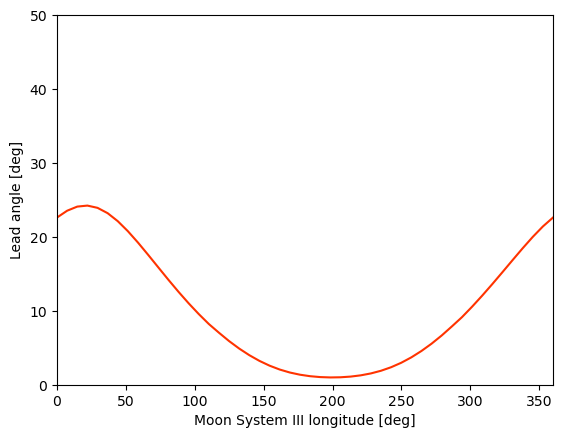

In [7]:
OMGR = 2*np.pi/(Psyn_ga)    # Moon's synodic angular velocity [rad/sec]
eq_lead = np.degrees(OMGR*tau_arr)
tau_arr_0 = tau_arr.copy()
eq_lead_0 = eq_lead.copy()

fig, ax = plt.subplots()
ax.set_xlim(0,360)
ax.set_xlabel('Moon System III longitude [deg]')
ax.set_ylim(0,50)
ax.set_ylabel('Lead angle [deg]')
ax.plot(np.degrees(moon_s3wlon), eq_lead, color=UC.red)


In [8]:
OMGR = 2*np.pi/(Psyn_ga)    # Moon's synodic angular velocity [rad/sec]

moon_s3wlon = np.radians(np.linspace(0,360,50))
tau_arr = np.zeros(moon_s3wlon.shape)

RHO0 = 200    # [amu cm-3] from Satoh+2024
Ti = 200      # 平均温度 [eV]
HP = Hp0*np.sqrt(Ti/Ai)     # [m] (Bagenal&Delamere2011)

for i in range(moon_s3wlon.size):
    S0 = LeadA.Awave().tracefield(15.0*RJ, moon_s3wlon[i])
    tau, _, _, _ = LeadA.Awave().tracefield2(15.0*RJ,moon_s3wlon[i],S0, RHO0, HP, 'N')
    tau_arr[i] = tau

Text(0.98, 0.96, 'Moon time $= t_0$ \nFootprint time $= t_0+\\tau_A$')

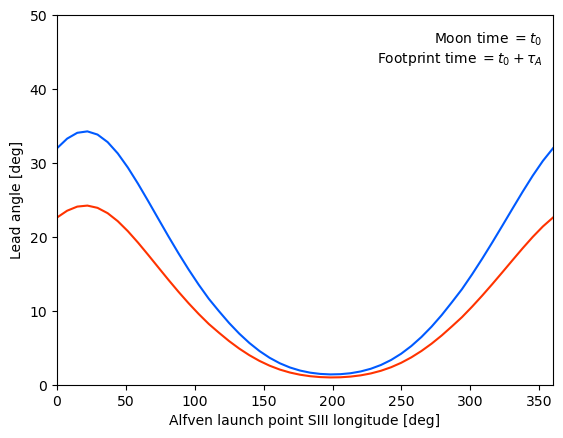

In [9]:
eq_lead = np.degrees(OMGR*tau_arr)
tau_arr_1 = tau_arr.copy()
eq_lead_1 = eq_lead.copy()

fig, ax = plt.subplots()
ax.set_xlim(0,360)
ax.set_xlabel('Alfven launch point SIII longitude [deg]')
ax.set_ylim(0,50)
ax.set_ylabel('Lead angle [deg]')
ax.plot(np.degrees(moon_s3wlon), eq_lead_0, color=UC.red)
ax.plot(np.degrees(moon_s3wlon), eq_lead_1, color=UC.blue)
ax.text(0.98, 0.96, 
        'Moon time $= t_0$ \nFootprint time $= t_0+\\tau_A$', 
        color='k',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,)

Text(0.98, 0.96, 'Moon time $= t_0-\\tau_A$ \nFootprint time $= t_0$')

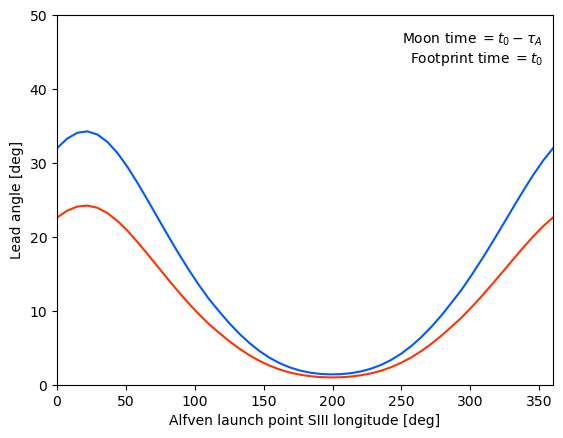

In [10]:
fig, ax = plt.subplots()
ax.set_xlim(0,360)
ax.set_xlabel('Alfven launch point SIII longitude [deg]')
ax.set_ylim(0,50)
ax.set_ylabel('Lead angle [deg]')
ax.plot(np.degrees(moon_s3wlon), eq_lead_0, color=UC.red)
ax.plot(np.degrees(moon_s3wlon), eq_lead_1, color=UC.blue)
ax.text(0.98, 0.96, 
        'Moon time $= t_0-\\tau_A$ \nFootprint time $= t_0$', 
        color='k',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,)

In [11]:
np.degrees(tau_arr_0*OMG_G)

array([1.37838759, 1.43447273, 1.46841611, 1.47670332, 1.45815676,
       1.41417554, 1.34834183, 1.26565165, 1.17159808, 1.07093859,
       0.96784665, 0.86535636, 0.76605737, 0.67146622, 0.58269322,
       0.50028036, 0.42839374, 0.35963194, 0.29786587, 0.24338675,
       0.19634756, 0.15701304, 0.12519127, 0.10061378, 0.08258312,
       0.07025857, 0.0629623 , 0.0600724 , 0.06140518, 0.06695776,
       0.07728737, 0.09300622, 0.11500142, 0.14408083, 0.18080677,
       0.22545883, 0.27809475, 0.33828881, 0.40577708, 0.48005602,
       0.5565751 , 0.64288652, 0.73416877, 0.82945919, 0.92754831,
       1.0267925 , 1.12489718, 1.21878603, 1.30481341, 1.37838759])

In [ ]:
moon_s3wlon = np.radians(np.linspace(0,360,50))
tau_arr = np.zeros(moon_s3wlon.shape)
OMGR = 2*np.pi/(Psyn_ga)    # Moon's synodic angular velocity [rad/sec]

# 密度が低いパターン
RHO0 = 50    # [amu cm-3] from Satoh+2024
Ti = 500      # 平均温度 [eV]
HP = Hp0*np.sqrt(Ti/Ai)     # [m] (Bagenal&Delamere2011)

for i in range(moon_s3wlon.size):
    S0 = LeadA.Awave().tracefield(15.0*RJ, moon_s3wlon[i])
    tau, _, _, _ = LeadA.Awave().tracefield2(15.0*RJ,moon_s3wlon[i],S0, RHO0, HP, 'S')
    tau_arr[i] = tau

eq_lead = np.degrees(OMGR*tau_arr)
tau_arr_0 = tau_arr.copy()
eq_lead_0 = eq_lead.copy()

# 密度が高いパターン
RHO0 = 100    # [amu cm-3] from Satoh+2024
Ti = 500      # 平均温度 [eV]
HP = Hp0*np.sqrt(Ti/Ai)     # [m] (Bagenal&Delamere2011)

for i in range(moon_s3wlon.size):
    S0 = LeadA.Awave().tracefield(15.0*RJ, moon_s3wlon[i])
    tau, _, _, _ = LeadA.Awave().tracefield2(15.0*RJ,moon_s3wlon[i],S0, RHO0, HP, 'S')
    tau_arr[i] = tau

eq_lead = np.degrees(OMGR*tau_arr)
tau_arr_1 = tau_arr.copy()
eq_lead_1 = eq_lead.copy()

# プロット
fig, ax = plt.subplots()
ax.set_xlim(0,360)
ax.set_xlabel('Alfven launch point SIII longitude [deg]')
ax.set_ylim(0,50)
ax.set_ylabel('Lead angle [deg]')
ax.plot(np.degrees(moon_s3wlon), eq_lead_0, color=UC.red)
ax.plot(np.degrees(moon_s3wlon), eq_lead_1, color=UC.blue)
ax.text(0.98, 0.96, 
        'Moon time $= t_0-\\tau_A$ \nFootprint time $= t_0$', 
        color='k',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,)

ValueError: too many values to unpack (expected 3)

Text(0.98, 0.96, 'Moon time $= t_0-\\tau_A$ \nFootprint time $= t_0$')

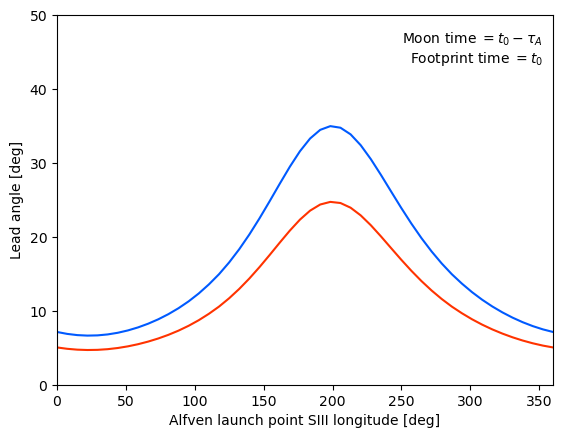

In [ ]:
moon_s3wlon = np.radians(np.linspace(0,360,50))
tau_arr = np.zeros(moon_s3wlon.shape)
OMGR = 2*np.pi/(Psyn_ga)    # Moon's synodic angular velocity [rad/sec]

# 密度が低いパターン
RHO0 = 50    # [amu cm-3] from Satoh+2024
Ti = 2000      # 平均温度 [eV]
HP = Hp0*np.sqrt(Ti/Ai)     # [m] (Bagenal&Delamere2011)

for i in range(moon_s3wlon.size):
    S0 = LeadA.Awave().tracefield(15.0*RJ, moon_s3wlon[i])
    tau, _, _, _ = LeadA.Awave().tracefield2(15.0*RJ,moon_s3wlon[i],S0, RHO0, HP, 'S')
    tau_arr[i] = tau

eq_lead = np.degrees(OMGR*tau_arr)
tau_arr_0 = tau_arr.copy()
eq_lead_0 = eq_lead.copy()

# 密度が高いパターン
RHO0 = 100    # [amu cm-3] from Satoh+2024
Ti = 2000      # 平均温度 [eV]
HP = Hp0*np.sqrt(Ti/Ai)     # [m] (Bagenal&Delamere2011)

for i in range(moon_s3wlon.size):
    S0 = LeadA.Awave().tracefield(15.0*RJ, moon_s3wlon[i])
    tau, _, _, _ = LeadA.Awave().tracefield2(15.0*RJ,moon_s3wlon[i],S0, RHO0, HP, 'S')
    tau_arr[i] = tau

eq_lead = np.degrees(OMGR*tau_arr)
tau_arr_1 = tau_arr.copy()
eq_lead_1 = eq_lead.copy()

# プロット
fig, ax = plt.subplots()
ax.set_xlim(0,360)
ax.set_xlabel('Alfven launch point SIII longitude [deg]')
ax.set_ylim(0,50)
ax.set_ylabel('Lead angle [deg]')
ax.plot(np.degrees(moon_s3wlon), eq_lead_0, color=UC.red)
ax.plot(np.degrees(moon_s3wlon), eq_lead_1, color=UC.blue)
ax.text(0.98, 0.96, 
        'Moon time $= t_0-\\tau_A$ \nFootprint time $= t_0$', 
        color='k',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,)

Text(0.98, 0.96, 'Moon time $= t_0-\\tau_A$ \nFootprint time $= t_0$')

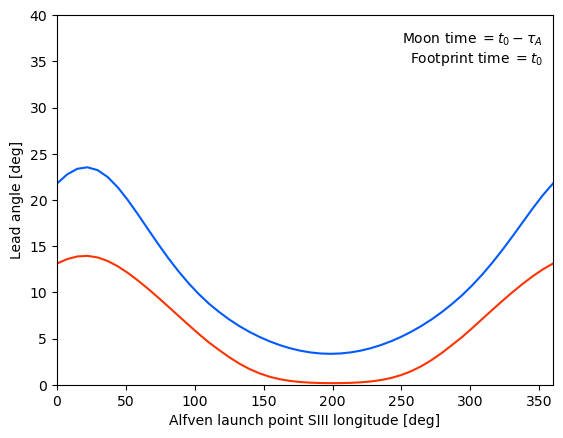

In [ ]:
moon_s3wlon = np.radians(np.linspace(0,360,50))
tau_arr = np.zeros(moon_s3wlon.shape)
OMGR = 2*np.pi/(Psyn_ga)    # Moon's synodic angular velocity [rad/sec]

# 温度が低いパターン
RHO0 = 50    # [amu cm-3] from Satoh+2024
Ti = 100      # 平均温度 [eV]
HP = Hp0*np.sqrt(Ti/Ai)     # [m] (Bagenal&Delamere2011)

for i in range(moon_s3wlon.size):
    S0 = LeadA.Awave().tracefield(15.0*RJ, moon_s3wlon[i])
    tau, _, _, _ = LeadA.Awave().tracefield2(15.0*RJ,moon_s3wlon[i],S0, RHO0, HP, 'N')
    tau_arr[i] = tau

eq_lead = np.degrees(OMGR*tau_arr)
tau_arr_0 = tau_arr.copy()
eq_lead_0 = eq_lead.copy()

# 温度が高いパターン
RHO0 = 50    # [amu cm-3] from Satoh+2024
Ti = 1000      # 平均温度 [eV]
HP = Hp0*np.sqrt(Ti/Ai)     # [m] (Bagenal&Delamere2011)

for i in range(moon_s3wlon.size):
    S0 = LeadA.Awave().tracefield(15.0*RJ, moon_s3wlon[i])
    tau, _, _, _ = LeadA.Awave().tracefield2(15.0*RJ,moon_s3wlon[i],S0, RHO0, HP, 'N')
    tau_arr[i] = tau

eq_lead = np.degrees(OMGR*tau_arr)
tau_arr_1 = tau_arr.copy()
eq_lead_1 = eq_lead.copy()

# プロット
fig, ax = plt.subplots()
ax.set_xlim(0,360)
ax.set_xlabel('Alfven launch point SIII longitude [deg]')
ax.set_ylim(0,40)
ax.set_ylabel('Lead angle [deg]')
ax.plot(np.degrees(moon_s3wlon), eq_lead_0, color=UC.red)
ax.plot(np.degrees(moon_s3wlon), eq_lead_1, color=UC.blue)
ax.text(0.98, 0.96, 
        'Moon time $= t_0-\\tau_A$ \nFootprint time $= t_0$', 
        color='k',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,)

Text(0.98, 0.96, 'Moon time $= t_0-\\tau_A$ \nFootprint time $= t_0$')

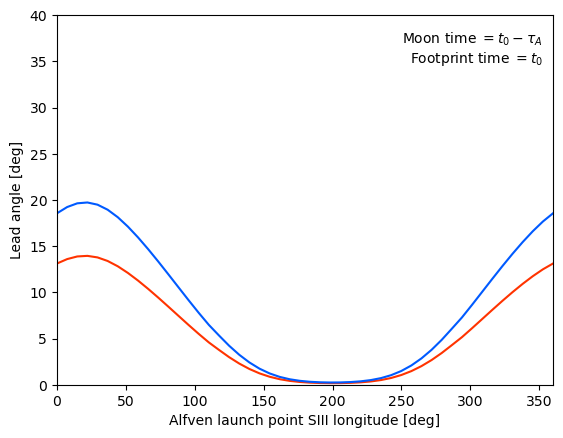

In [ ]:
moon_s3wlon = np.radians(np.linspace(0,360,50))
tau_arr = np.zeros(moon_s3wlon.shape)
OMGR = 2*np.pi/(Psyn_ga)    # Moon's synodic angular velocity [rad/sec]

# 密度が低いパターン
RHO0 = 50    # [amu cm-3] from Satoh+2024
Ti = 100      # 平均温度 [eV]
HP = Hp0*np.sqrt(Ti/Ai)     # [m] (Bagenal&Delamere2011)

for i in range(moon_s3wlon.size):
    S0 = LeadA.Awave().tracefield(15.0*RJ, moon_s3wlon[i])
    tau, _, _, _ = LeadA.Awave().tracefield2(15.0*RJ,moon_s3wlon[i],S0, RHO0, HP, 'N')
    tau_arr[i] = tau

eq_lead = np.degrees(OMGR*tau_arr)
tau_arr_0 = tau_arr.copy()
eq_lead_0 = eq_lead.copy()

# 密度が高いパターン
RHO0 = 100    # [amu cm-3] from Satoh+2024
Ti = 100      # 平均温度 [eV]
HP = Hp0*np.sqrt(Ti/Ai)     # [m] (Bagenal&Delamere2011)

for i in range(moon_s3wlon.size):
    S0 = LeadA.Awave().tracefield(15.0*RJ, moon_s3wlon[i])
    tau, _, _, _ = LeadA.Awave().tracefield2(15.0*RJ,moon_s3wlon[i],S0, RHO0, HP, 'N')
    tau_arr[i] = tau

eq_lead = np.degrees(OMGR*tau_arr)
tau_arr_1 = tau_arr.copy()
eq_lead_1 = eq_lead.copy()

# プロット
fig, ax = plt.subplots()
ax.set_xlim(0,360)
ax.set_xlabel('Alfven launch point SIII longitude [deg]')
ax.set_ylim(0,40)
ax.set_ylabel('Lead angle [deg]')
ax.plot(np.degrees(moon_s3wlon), eq_lead_0, color=UC.red)
ax.plot(np.degrees(moon_s3wlon), eq_lead_1, color=UC.blue)
ax.text(0.98, 0.96, 
        'Moon time $= t_0-\\tau_A$ \nFootprint time $= t_0$', 
        color='k',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,)

#1
Goal: 121.05053652411112
Goal: 120.50331496253952
Goal: 120.1386847927177
Goal: 119.9787962828191
Goal: 120.02944098709631
Goal: 120.2860453213063
Goal: 120.73896574850278
Goal: 121.36736688072017
Goal: 122.14363220445564
Goal: 123.04589403723415
Goal: 124.04604065100897
Goal: 125.12791513617263
Goal: 126.26718589878908
Goal: 127.44719880004342
Goal: 128.65345784580603
Goal: 129.86669979771537
Goal: 131.01706949764133
Goal: 132.1801256123031
Goal: 133.2873927338666
Goal: 134.31185947998824
Goal: 135.23310125976062
Goal: 136.02863023955874
Goal: 136.6853495154413
Goal: 137.1929778963992
Goal: 137.55564407945184
Goal: 137.7835626866039
Goal: 137.88628077739614
Goal: 137.88240281583342
Goal: 137.78001018801314
Goal: 137.59716113663185
Goal: 137.32506940311492
Goal: 136.9662528137975
Goal: 136.51849949518663
Goal: 135.979245722091
Goal: 135.34422478869413
Goal: 134.62171635282525
Goal: 133.81611829209473
Goal: 132.9366368502792
Goal: 131.99052408712265
Goal: 130.98916191519336
Goal: 129

Text(0.98, 0.96, 'Moon time $= t_0-\\tau_A$ \nFootprint time $= t_0$')

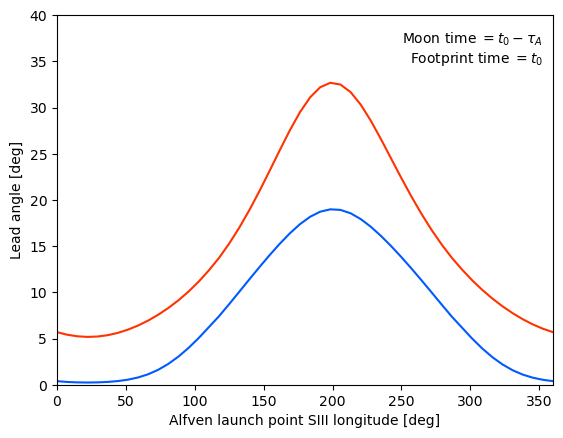

In [ ]:
moon_s3wlon = np.radians(np.linspace(0,360,50))
tau_arr = np.zeros(moon_s3wlon.shape)
OMGR = 2*np.pi/(Psyn_ga)    # Moon's synodic angular velocity [rad/sec]

# 低密高温のパターン
print('#1')
RHO0 = 100    # [amu cm-3] from Satoh+2024
Ti = 500      # 平均温度 [eV]
Ai = 8
HP = Hp0*np.sqrt(Ti/Ai)     # [m] (Bagenal&Delamere2011)

for i in range(moon_s3wlon.size):
    S0 = LeadA.Awave().tracefield(15.0*RJ, moon_s3wlon[i])
    tau, theta, _, _ = LeadA.Awave().tracefield2(15.0*RJ,moon_s3wlon[i],S0, RHO0, HP, 'S')
    tau_arr[i] = tau
    print('Goal:', math.degrees(theta[-1]))

eq_lead = np.degrees(OMGR*tau_arr)
tau_arr_0 = tau_arr.copy()
eq_lead_0 = eq_lead.copy()

# 高密低温のパターン
print('#2')
RHO0 = 100    # [amu cm-3] from Satoh+2024
Ti = 100     # 平均温度 [eV]
Ai = 18
HP = Hp0*np.sqrt(Ti/Ai)     # [m] (Bagenal&Delamere2011)

for i in range(moon_s3wlon.size):
    S0 = LeadA.Awave().tracefield(15.0*RJ, moon_s3wlon[i])
    tau, theta, _, _ = LeadA.Awave().tracefield2(15.0*RJ,moon_s3wlon[i],S0, RHO0, HP, 'S')
    tau_arr[i] = tau
    print('Goal:', math.degrees(theta[-1]))

eq_lead = np.degrees(OMGR*tau_arr)
tau_arr_1 = tau_arr.copy()
eq_lead_1 = eq_lead.copy()

# プロット
fig, ax = plt.subplots()
ax.set_xlim(0,360)
ax.set_xlabel('Alfven launch point SIII longitude [deg]')
ax.set_ylim(0,40)
ax.set_ylabel('Lead angle [deg]')
ax.plot(np.degrees(moon_s3wlon), eq_lead_0, color=UC.red)
ax.plot(np.degrees(moon_s3wlon), eq_lead_1, color=UC.blue)
ax.text(0.98, 0.96, 
        'Moon time $= t_0-\\tau_A$ \nFootprint time $= t_0$', 
        color='k',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,)

In [17]:
S0 = LeadA.Awave().tracefield(15.0*RJ, math.radians(0))
tau, _, _, _ = LeadA.Awave().tracefield2(15.0*RJ,math.radians(0),S0, RHO0, HP, 'N')

In [18]:
tau_arr_0/60

array([ 9.97840114,  9.49806986,  9.19780107,  9.08266526,  9.15317539,
        9.40770727,  9.84362204, 10.45586894, 11.23662281, 12.18438983,
       13.29725583, 14.58194178, 16.04594588, 17.70851174, 19.59226334,
       21.72559457, 24.0824158 , 26.79262671, 29.82099116, 33.16311955,
       36.78770055, 40.61737562, 44.52610676, 48.32254442, 51.76480572,
       54.58090702, 56.50543194, 57.34563679, 57.01765289, 55.58155245,
       53.20595355, 50.14165053, 46.65203295, 42.97694052, 39.30697155,
       35.77515381, 32.46151939, 29.4094893 , 26.62867024, 24.1130768 ,
       21.89881487, 19.85840001, 18.02505862, 16.38018439, 14.90838358,
       13.59931413, 12.4491953 , 11.46038742, 10.63471311,  9.97840114])

#1
Va [km]: 406.33076260777784
Va [km]: 431.2731198654053
Va [km]: 448.49595729794925
Va [km]: 455.3869668094287
Va [km]: 450.917483927214
Va [km]: 435.90112918017365
Va [km]: 412.65058625216574
Va [km]: 384.2971989789833
Va [km]: 353.9647566861168
Va [km]: 323.9773577742731
Va [km]: 296.0704247459524
Va [km]: 271.3481142620604
Va [km]: 250.71392571622664
Va [km]: 234.91682429518963
Va [km]: 224.7359070157106
Va [km]: 220.83527352701213
Va [km]: 223.45845688517113
Va [km]: 232.59207447146474
Va [km]: 247.74559336489702
Va [km]: 268.18957661439026
Va [km]: 293.15079333896466
Va [km]: 321.7304658805639
Va [km]: 352.85143377110853
Va [km]: 384.80948196881786
Va [km]: 415.23301537982445
Va [km]: 441.0891410925684
Va [km]: 458.87964852089067
Va [km]: 465.91556210095575
Va [km]: 460.8098174870854
Va [km]: 444.5547654537582
Va [km]: 419.43791705970386
Va [km]: 388.954711132409
Va [km]: 356.27932102725475
Va [km]: 324.0094163861605
Va [km]: 293.9686538924747
Va [km]: 267.316704778579
Va [km]: 

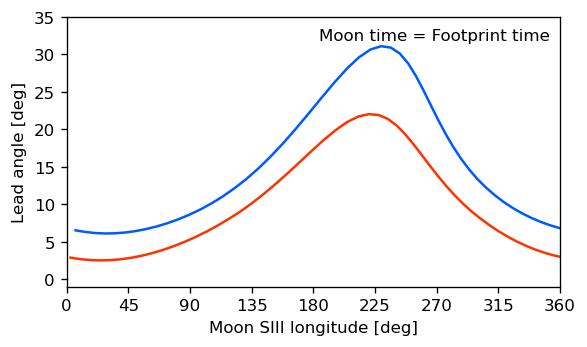

In [ ]:
moon_s3wlon = np.radians(np.linspace(0,359.9,50))
tau_arr = np.zeros(moon_s3wlon.shape)
OMGR = 2*np.pi/(Psyn_ga)    # Moon's synodic angular velocity [rad/sec]

# 低温のパターン
print('#1')
ni = 4.0     # ion number density [cm-3] range (1-8) (Jia & Kivelson 2021)
Zi = 1.3     # ion average charge                    (Jia & Kivelson 2021)
Ai = 14      # ion mass [amu]                        (Jia & Kivelson 2021)
Ti = 60      # ion temperature [eV]                  (Jia & Kivelson 2021)
Te = 300     # electron temperature [eV]             (Jia & Kivelson 2021)

RHO0 = ni*Ai # [amu cm-3]
HP = Hp0*np.sqrt(Ti/Ai)     # [m] (Bagenal&Delamere2011)
HP = Hp0*np.sqrt((Ti/Ai)*(1+Zi*(Te/Ti)))  # [m] (Steffl+2004)

for i in range(moon_s3wlon.size):
    S0 = LeadA.Awave().tracefield(15.0*RJ, moon_s3wlon[i])
    tau, theta, Va, _ = LeadA.Awave().tracefield2(15.0*RJ,moon_s3wlon[i],S0, RHO0, HP, 'S')
    tau_arr[i] = tau
    print('Va [km]:', Va[0]/1000)

eq_lead = np.degrees(OMGR*tau_arr)
tau_arr_0 = tau_arr.copy()
eq_lead_0 = eq_lead.copy()

# 高密度のパターン
print('#2')
ni = 11.0    # ion number density [cm-3]
Ai = 7.0     # ion mass [amu] 
Ti = 500     # ion temperature [eV] 

RHO0 = ni*Ai # [amu cm-3]
HP = Hp0*np.sqrt(Ti/Ai)     # [m] (Bagenal&Delamere2011)
HP = Hp0*np.sqrt((Ti/Ai)*(1+Zi*(Te/Ti)))  # [m] (Steffl+2004)

for i in range(moon_s3wlon.size):
    S0 = LeadA.Awave().tracefield(15.0*RJ, moon_s3wlon[i])
    tau, theta, Va, phi = LeadA.Awave().tracefield2(15.0*RJ,moon_s3wlon[i],S0, RHO0, HP, 'S')
    tau_arr[i] = tau
    print('Va [km]:', Va[0]/1000)

eq_lead = np.degrees(OMGR*tau_arr)
tau_arr_1 = tau_arr.copy()
eq_lead_1 = eq_lead.copy()

# プロット
fig, ax = plt.subplots(figsize=(5,3),dpi=120)
ax.set_xlim(0,360)
ax.set_ylim(-1,35)
ax.set_xticks(np.linspace(0,360,9))
ax.set_xticklabels(np.linspace(0,360,9,dtype=int))
ax.set_yticks(np.arange(0,35+1,5))
ax.set_yticklabels(np.arange(0,35+1,5))
ax.set_xlabel('Moon SIII longitude [deg]')
ax.set_ylabel('Lead angle [deg]')
ax.plot(np.degrees(moon_s3wlon)+eq_lead_0, eq_lead_0, color=UC.red)
ax.plot(np.degrees(moon_s3wlon)+eq_lead_1, eq_lead_1, color=UC.blue)
ax.text(0.98, 0.96, 
        'Moon time = Footprint time', 
        color='k',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,)
fig.tight_layout()

In [60]:
# Jia & Kivelson (2021)のパラメータ
ni = 4.0     # ion number density [cm-3] range (1-8) (Jia & Kivelson 2021)
Zi = 1.3     # ion average charge                    (Jia & Kivelson 2021)
Ai = 14      # ion mass [amu]                        (Jia & Kivelson 2021)
RHO0 = ni*Ai # [amu cm-3]
Ti = 60      # ion temperature [eV]                  (Jia & Kivelson 2021)
Te = 300     # electron temperature [eV]             (Jia & Kivelson 2021)

HP = Hp0*np.sqrt(Ti/Ai)     # [m] (Bagenal&Delamere2011)
print(HP/RJ)

HP = Hp0*np.sqrt((Ti/Ai)*(1+Zi*(Te/Ti)))     # [m] (Steffl+2004)
print(HP/RJ)

1.32492587393732
3.6284589408885815


#1
#2


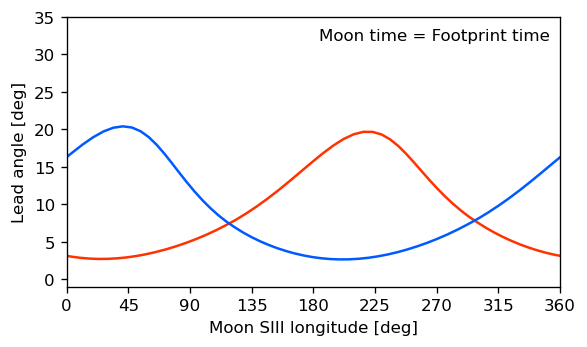

In [61]:
# 南北MAW
moon_s3wlon = np.radians(np.linspace(-20,380,60))
tau_arr = np.zeros(moon_s3wlon.shape)
OMGR = 2*np.pi/(Psyn_ga)    # Moon's synodic angular velocity [rad/sec]

# 低温のパターン
print('#1')
Ai = 10      # ion mass [amu] 

RHO0 = ni*Ai # [amu cm-3]
HP = Hp0*np.sqrt(Ti/Ai)     # [m] (Bagenal&Delamere2011)
HP = Hp0*np.sqrt((Ti/Ai)*(1+Zi*(Te/Ti)))  # [m] (Steffl+2004)

for i in range(moon_s3wlon.size):
    S0 = LeadA.Awave().tracefield(15.0*RJ, moon_s3wlon[i])
    tau, theta, Va, _ = LeadA.Awave().tracefield2(15.0*RJ,moon_s3wlon[i],S0, RHO0, HP, 'S')
    tau_arr[i] = tau
    # print('Va [km]:', Va[0]/1000)

eq_lead = np.degrees(OMGR*tau_arr)
tau_arr_0 = tau_arr.copy()
eq_lead_0 = eq_lead.copy()

# 高密度のパターン
print('#2')

RHO0 = ni*Ai # [amu cm-3]
HP = Hp0*np.sqrt(Ti/Ai)     # [m] (Bagenal&Delamere2011)
HP = Hp0*np.sqrt((Ti/Ai)*(1+Zi*(Te/Ti)))  # [m] (Steffl+2004)

for i in range(moon_s3wlon.size):
    S0 = LeadA.Awave().tracefield(15.0*RJ, moon_s3wlon[i])
    tau, theta, Va, phi = LeadA.Awave().tracefield2(15.0*RJ,moon_s3wlon[i],S0, RHO0, HP, 'N')
    tau_arr[i] = tau
    # print('Va [km]:', Va[0]/1000)

eq_lead = np.degrees(OMGR*tau_arr)
tau_arr_1 = tau_arr.copy()
eq_lead_1 = eq_lead.copy()

# プロット
fig, ax = plt.subplots(figsize=(5,3),dpi=120)
ax.set_xlim(0,360)
ax.set_ylim(-1,35)
ax.set_xticks(np.linspace(0,360,9))
ax.set_xticklabels(np.linspace(0,360,9,dtype=int))
ax.set_yticks(np.arange(0,35+1,5))
ax.set_yticklabels(np.arange(0,35+1,5))
ax.set_xlabel('Moon SIII longitude [deg]')
ax.set_ylabel('Lead angle [deg]')
ax.plot(np.degrees(moon_s3wlon)+eq_lead_0, eq_lead_0, color=UC.red)
ax.plot(np.degrees(moon_s3wlon)+eq_lead_1, eq_lead_1, color=UC.blue)
ax.text(0.98, 0.96, 
        'Moon time = Footprint time', 
        color='k',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,)
fig.tight_layout()

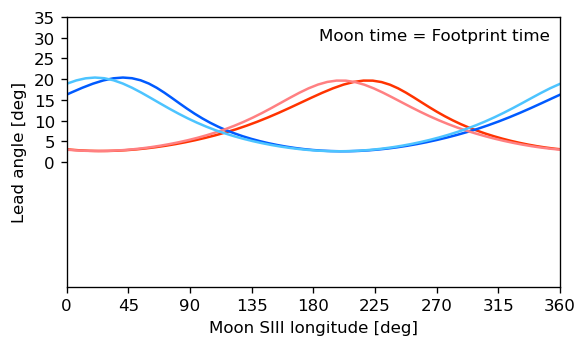

In [62]:
# プロット
fig, ax = plt.subplots(figsize=(5,3),dpi=120)
ax.set_xlim(0,360)
ax.set_ylim(-30,30)
ax.set_xticks(np.linspace(0,360,9))
ax.set_xticklabels(np.linspace(0,360,9,dtype=int))
ax.set_yticks(np.arange(0,35+1,5))
ax.set_yticklabels(np.arange(0,35+1,5))
ax.set_xlabel('Moon SIII longitude [deg]')
ax.set_ylabel('Lead angle [deg]')
ax.plot(np.degrees(moon_s3wlon)+eq_lead_0, eq_lead_0, color=UC.red)
ax.plot(np.degrees(moon_s3wlon)+eq_lead_1, eq_lead_1, color=UC.blue)
ax.plot(np.degrees(moon_s3wlon), eq_lead_0, color=UC.pink)
ax.plot(np.degrees(moon_s3wlon), eq_lead_1, color=UC.lightblue)
ax.text(0.98, 0.96, 
        'Moon time = Footprint time', 
        color='k',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,)
fig.tight_layout()

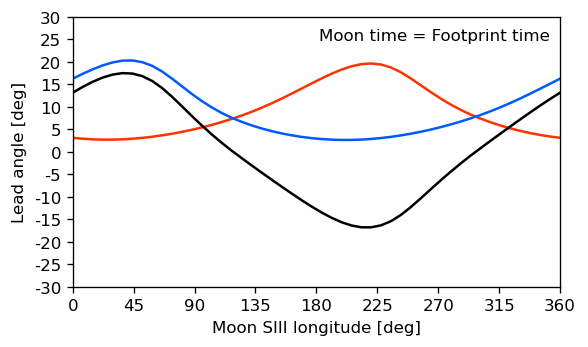

In [63]:
n_moon_s3wlon = np.linspace(0,360,50)  # [deg]
n_eq_lead_0 = np.interp(n_moon_s3wlon, np.degrees(moon_s3wlon)+eq_lead_0, eq_lead_0)
n_eq_lead_1 = np.interp(n_moon_s3wlon, np.degrees(moon_s3wlon)+eq_lead_1, eq_lead_1)

# プロット
fig, ax = plt.subplots(figsize=(5,3),dpi=120)
ax.set_xlim(0,360)
ax.set_ylim(-30,30)
ax.set_xticks(np.linspace(0,360,9))
ax.set_xticklabels(np.linspace(0,360,9,dtype=int))
ax.set_yticks(np.arange(-30,30+1,5))
ax.set_yticklabels(np.arange(-30,30+1,5))
ax.set_xlabel('Moon SIII longitude [deg]')
ax.set_ylabel('Lead angle [deg]')
ax.plot(n_moon_s3wlon, n_eq_lead_0, color=UC.red)
ax.plot(n_moon_s3wlon, n_eq_lead_1, color=UC.blue)
ax.plot(n_moon_s3wlon, n_eq_lead_1-n_eq_lead_0, color='k')
ax.text(0.98, 0.96, 
        'Moon time = Footprint time', 
        color='k',
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes,)
fig.tight_layout()